In [1]:
import os
import utilities as rocku
import matplotlib.pyplot as plt
import numpy as np
import multiprocessing as mp
import timeit
from pystackreg import StackReg
from PIL import Image
import dxchange
from tqdm import tqdm
# from skimage.transform import rescale
import skimage as ski
ncore = mp.cpu_count()
print("CPU cores:", ncore)

CPU cores: 256


In [3]:
# need to change
instrument = "/HFIR/CG1D"
# instrument = "/SNS/VENUS"
ipts="26282"
# scan_type = 'ct_scans'
# scan_type = 'radiographs'
# scan_type = 'Total Images_10 thermal cycles'
scan_type = 'processed_data/normalized/sorted'
# scan_type = 'analysis'
# scan_type = 'analysis'
####################################
##################################
scan_loc = instrument + "/IPTS-"+ipts+"/shared/" + scan_type
save_loc = instrument + "/IPTS-"+ipts+"/shared/analysis/"
folder_list = os.listdir(scan_loc)
folder_list.sort()
folder_list

['Group_01_Cool',
 'Group_02_Heat',
 'Group_03_Cool',
 'Group_04_Heat',
 'Group_05_Cool',
 'Group_06_Heat',
 'Group_07_Cool',
 'Group_08_Heat',
 'Group_09_Cool',
 'Group_10_Heat',
 'Group_11_Cool',
 'Group_12_Heat',
 'Group_13_Cool',
 'Group_14_Heat',
 'Group_15_Cool',
 'Group_16_Heat',
 'Group_17_Cool',
 'Group_18_Heat',
 'Group_19_Cool',
 'Group_20_Heat',
 'Group_21_Cool',
 'Group_22_Heat']

In [18]:
sample_name = "Group_03_Cool"
######################
######################
######################
scan_dir = os.path.join(scan_loc, sample_name)
fname_list = os.listdir(scan_dir)
fname_list.sort()
fname_list

['0439_Cool_cylce_1_0009_0439.tiff',
 '0442_Cool_cylce_1_0009_0442.tiff',
 '0445_Cool_cylce_1_0009_0445.tiff',
 '0448_Cool_cylce_1_0009_0448.tiff',
 '0451_Cool_cylce_1_0009_0451.tiff',
 '0454_Cool_cylce_1_0009_0454.tiff',
 '0457_Cool_cylce_1_0009_0457.tiff',
 '0460_Cool_cylce_1_0009_0460.tiff',
 '0463_Cool_cylce_1_0009_0463.tiff',
 '0466_Cool_cylce_1_0009_0466.tiff',
 '0469_Cool_cylce_1_0009_0469.tiff',
 '0472_Cool_cylce_1_0009_0472.tiff',
 '0475_Cool_cylce_1_0009_0475.tiff',
 '0478_Cool_cylce_1_0009_0478.tiff',
 '0481_Cool_cylce_1_0009_0481.tiff',
 '0484_Cool_cylce_1_0009_0484.tiff',
 '0487_Cool_cylce_1_0009_0487.tiff',
 '0490_Cool_cylce_1_0009_0490.tiff',
 '0493_Cool_cylce_1_0009_0493.tiff',
 '0496_Cool_cylce_1_0009_0496.tiff',
 '0499_Cool_cylce_1_0009_0499.tiff',
 '0502_Cool_cylce_1_0009_0502.tiff',
 '0505_Cool_cylce_1_0009_0505.tiff',
 '0508_Cool_cylce_1_0009_0508.tiff',
 '0511_Cool_cylce_1_0009_0511.tiff',
 '0514_Cool_cylce_1_0009_0514.tiff',
 '0517_Cool_cylce_1_0009_0517.tiff',
 

In [19]:
to_rmv = [
# '01_heat_hold_at_400_0030_0001.tiff',
#  '01_heat_hold_at_400_0030_0006.tiff',
#  '01_heat_hold_at_400_0030_0011.tiff',
#  '02_heating_at_800_0030_0001.tiff',
#  '02_heating_at_800_0030_0006.tiff',
#  '02_heating_at_800_0030_0011.tiff',
#  '02_heating_at_800_0030_0016.tiff',
]
fname_list = rocku.remove_fnames(fname_list, to_rmv)
fname_list

154
154


['0439_Cool_cylce_1_0009_0439.tiff',
 '0442_Cool_cylce_1_0009_0442.tiff',
 '0445_Cool_cylce_1_0009_0445.tiff',
 '0448_Cool_cylce_1_0009_0448.tiff',
 '0451_Cool_cylce_1_0009_0451.tiff',
 '0454_Cool_cylce_1_0009_0454.tiff',
 '0457_Cool_cylce_1_0009_0457.tiff',
 '0460_Cool_cylce_1_0009_0460.tiff',
 '0463_Cool_cylce_1_0009_0463.tiff',
 '0466_Cool_cylce_1_0009_0466.tiff',
 '0469_Cool_cylce_1_0009_0469.tiff',
 '0472_Cool_cylce_1_0009_0472.tiff',
 '0475_Cool_cylce_1_0009_0475.tiff',
 '0478_Cool_cylce_1_0009_0478.tiff',
 '0481_Cool_cylce_1_0009_0481.tiff',
 '0484_Cool_cylce_1_0009_0484.tiff',
 '0487_Cool_cylce_1_0009_0487.tiff',
 '0490_Cool_cylce_1_0009_0490.tiff',
 '0493_Cool_cylce_1_0009_0493.tiff',
 '0496_Cool_cylce_1_0009_0496.tiff',
 '0499_Cool_cylce_1_0009_0499.tiff',
 '0502_Cool_cylce_1_0009_0502.tiff',
 '0505_Cool_cylce_1_0009_0505.tiff',
 '0508_Cool_cylce_1_0009_0508.tiff',
 '0511_Cool_cylce_1_0009_0511.tiff',
 '0514_Cool_cylce_1_0009_0514.tiff',
 '0517_Cool_cylce_1_0009_0517.tiff',
 

In [20]:
img_stack = rocku.read_img_stack(scan_dir, fname_list, flipud=False)
trans_algo_dict = {
    'TRANSLATION': StackReg.TRANSLATION,
    'RIGID_BODY': StackReg.RIGID_BODY,
    'SCALED_ROTATION': StackReg.SCALED_ROTATION,
    'AFFINE': StackReg.AFFINE,
    'BILINEAR': StackReg.BILINEAR
}

154it [00:16,  9.33it/s]


Text(0.5, 1.0, 'last/first')

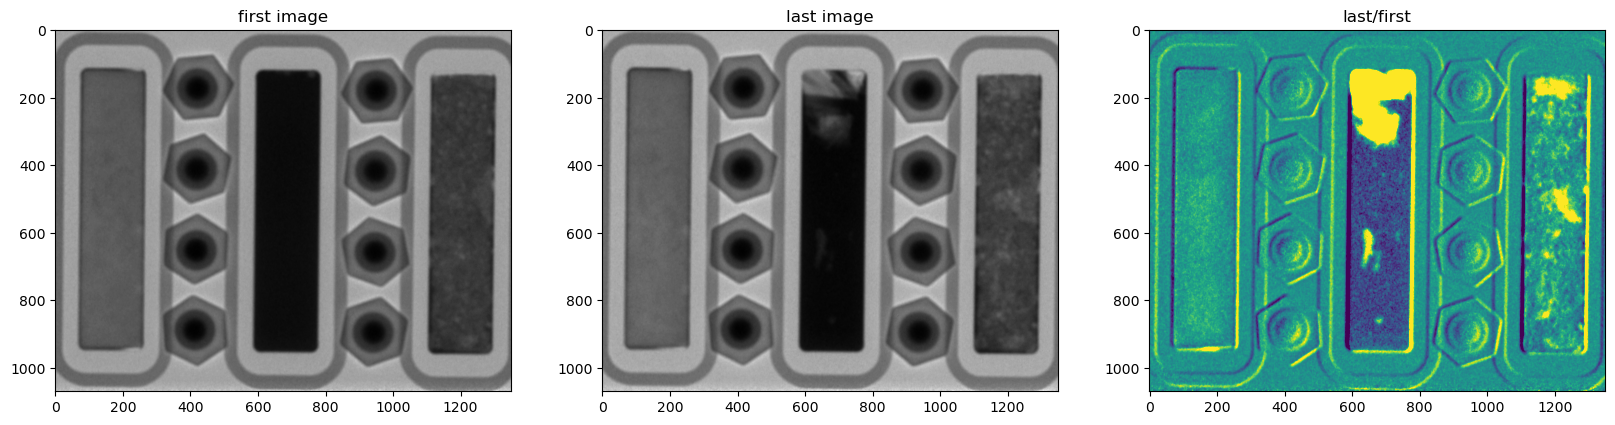

In [21]:
f, ax = plt.subplots(1, 3, figsize=(20, 20))
ax[0].imshow(img_stack[0], cmap='gray')#vmin=0, vmax=1,
ax[0].set_title('first image')

ax[1].imshow(img_stack[-1], cmap='gray')
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack[-1], img_stack[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

Text(0.5, 1.0, 'overlay (reference=green, changed=red)')

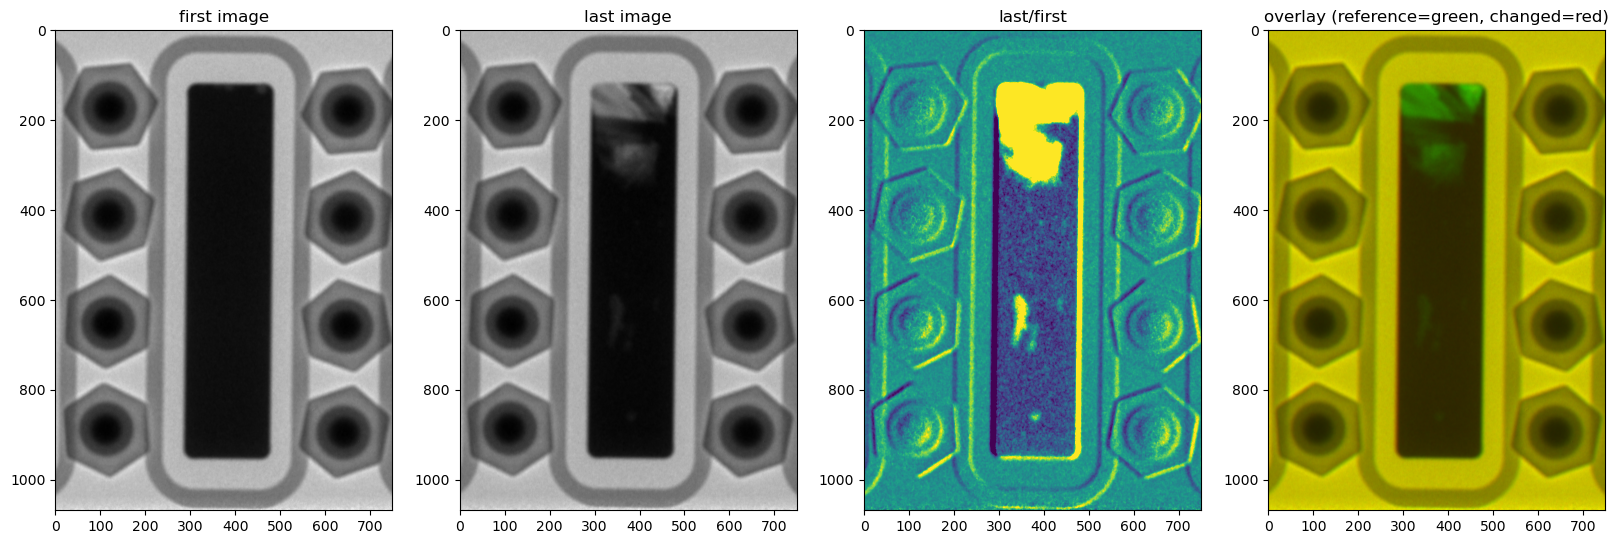

In [22]:
roi = True
# roi = False
roi_left = 300#300
roi_right = 1050#1650
roi_top = 0
roi_bottom = -1
# roi_left = 250
# roi_right = 1350
# roi_top = 900
# roi_bottom = 1350
#########################
#########################
img_stack_roi = rocku.crop(img_stack, roi_left, roi_right, roi_top, roi_bottom, roi)
f, ax = plt.subplots(1, 4, figsize=(20, 10))
ax[0].imshow(img_stack_roi[0], cmap='gray')# vmin=0, vmax=1)
ax[0].set_title('first image')

ax[1].imshow(img_stack_roi[-1], cmap='gray')# vmin=0, vmax=1)
ax[1].set_title('last image')

ax[2].imshow(np.divide(img_stack_roi[-1], img_stack_roi[0]), vmin=0.8, vmax=1.2)
ax[2].set_title('last/first')

ax[3].imshow(rocku.composite_images([img_stack_roi[0], img_stack_roi[-1]]))
ax[3].set_title('overlay (reference=green, changed=red)')
# ax[3].axis('off');

In [23]:
pixel_bin_size = 1
# pixel_bin_size = 2
func = np.sum
# dtype = np.float16
dtype = np.float32
# dtype = np.float64
#################################################
t0 = timeit.default_timer()
img_stack_resized = rocku.bin_pix(img_stack_roi, pixel_bin_size=pixel_bin_size, func=func, dtype=dtype)
t1 = timeit.default_timer()
print("Time: {} s".format(t1-t0))

Pixel_bin_size = 1, no binning
Time: 6.202096119523048e-05 s


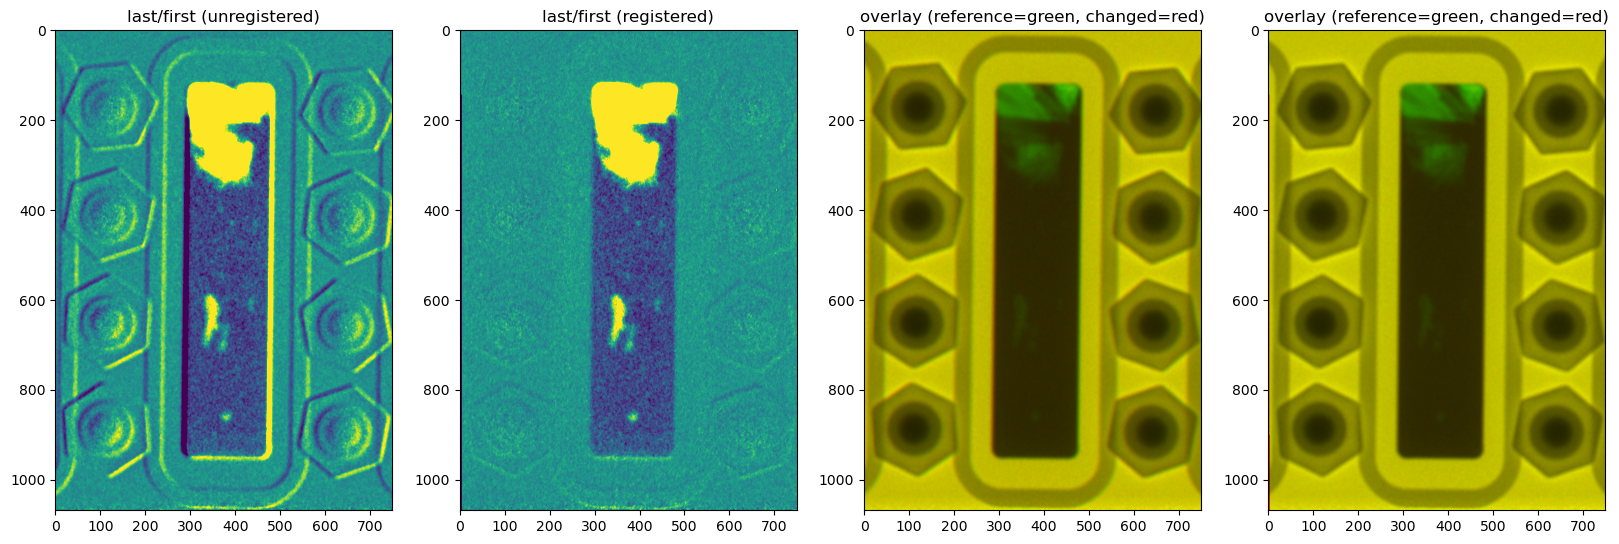

In [24]:
# perform_reg = False
perform_reg = True
trans_algo = 'RIGID_BODY'
# trans_algo = 'TRANSLATION'
# trans_algo = "SCALED_ROTATION"
#########################
#load reference and "moved" image
random_idx = None
if perform_reg:
    ref = img_stack_resized[0]
    mov = img_stack_resized[-1]
    sr = StackReg(trans_algo_dict[trans_algo])
    reg = sr.register_transform(ref, mov)
    reg = reg.clip(min=0)
    after_reg = rocku.composite_images([ref, reg])
    before_reg = rocku.composite_images([ref, mov])
    
    f, ax = plt.subplots(1, 4, figsize=(20, 10))
    ax[0].imshow(np.divide(mov, ref), vmin=0.8, vmax=1.2)
    ax[0].set_title('last/first (unregistered)')
    
    ax[1].imshow(np.divide(reg, ref), vmin=0.8, vmax=1.2)
    ax[1].set_title('last/first (registered)')
    
    ax[2].imshow(before_reg)
    ax[2].set_title('overlay (reference=green, changed=red)')
    
    ax[3].imshow(after_reg)
    ax[3].set_title('overlay (reference=green, changed=red)')

100%|█████████████████████████████████████████| 153/153 [00:59<00:00,  2.57it/s]


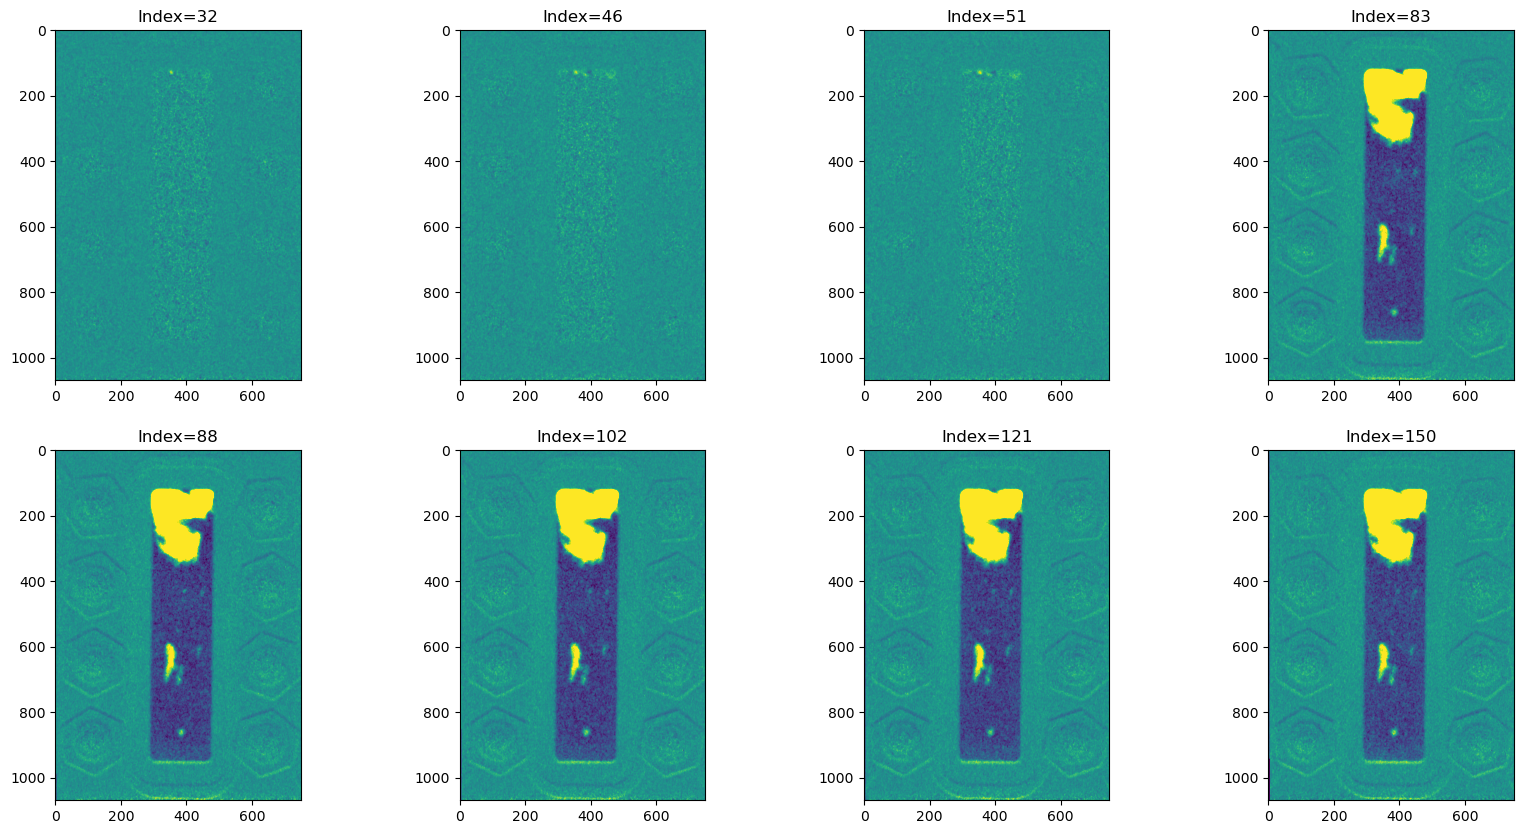

In [25]:
reference = 'previous'
# reference = 'first'
# reference = 'mean'
moving_avg = 1
n_frames = 1
init_avg_size = 3
#################################################
if perform_reg:
    sr = StackReg(trans_algo_dict[trans_algo])
    reg_stack_roi = sr.register_transform_stack(img_stack_resized, reference=reference, n_frames=n_frames, moving_average=moving_avg, verbose=True)#, progress_callback=rocku.show_progress)
else:
    reg_stack_roi = img_stack_resized[:]
if init_avg_size > 1:
    reg_ratio = np.divide(reg_stack_roi, np.mean(reg_stack_roi[0:init_avg_size-1,:,:], axis=0))
else:
    reg_ratio = np.divide(reg_stack_roi, reg_stack_roi[0])
if random_idx is None:
    num_of_row = 2
    fig_per_row = 4
    random_idx = rocku.generate_randint_list(num_of_ele=fig_per_row*num_of_row, range_min=0, range_max=len(reg_ratio))
fig_size = (20,10)
vmin=0.8
vmax=1.2
rocku.plot_imgs_from_stack(reg_ratio, random_idx, vmin=vmin, vmax=vmax, fig_per_row=fig_per_row, figsize=fig_size)

100%|█████████████████████████████████████████| 153/153 [01:20<00:00,  1.91it/s]


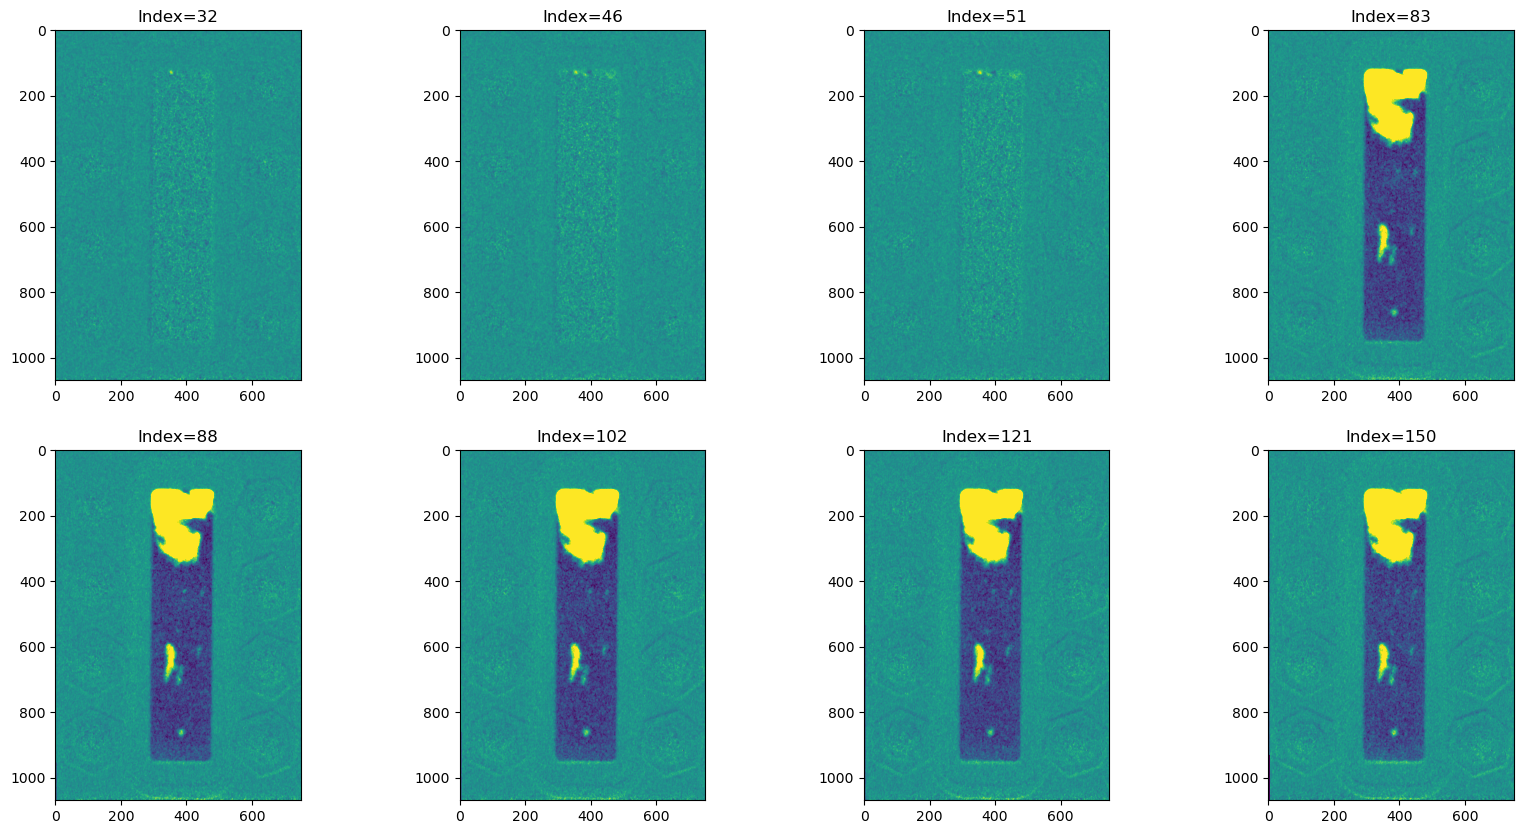

In [26]:
# reference = 'previous'
reference = 'first'
# reference = 'mean'
moving_avg = 1
n_frames = 1
init_avg_size = 3
#################################################
if perform_reg:
    sr = StackReg(trans_algo_dict[trans_algo])
    reg_stack_roi = sr.register_transform_stack(img_stack_resized, reference=reference, n_frames=n_frames, moving_average=moving_avg, verbose=True)#, progress_callback=rocku.show_progress)
else:
    reg_stack_roi = img_stack_resized[:]
if init_avg_size > 1:
    reg_ratio = np.divide(reg_stack_roi, np.mean(reg_stack_roi[0:init_avg_size-1,:,:], axis=0))
else:
    reg_ratio = np.divide(reg_stack_roi, reg_stack_roi[0])
if random_idx is None:
    num_of_row = 2
    fig_per_row = 4
    random_idx = rocku.generate_randint_list(num_of_ele=fig_per_row*num_of_row, range_min=0, range_max=len(reg_ratio))
fig_size = (20,10)
vmin=0.8
vmax=1.2
rocku.plot_imgs_from_stack(reg_ratio, random_idx, vmin=vmin, vmax=vmax, fig_per_row=fig_per_row, figsize=fig_size)

# Crop

Cropped:


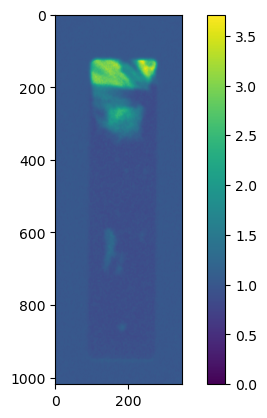

In [27]:
###################### need to change start
crop = True
# crop = False
# crop_left = 250
# crop_right = 1650
# crop_top = 750
# crop_bottom = 1950
crop_left = 200
crop_right = -200
crop_top = 0#530
crop_bottom = -50
###################### need to change end
reg_ratio_out = reg_ratio[:]
reg_ratio_crop_out = rocku.crop(reg_ratio_out, crop_left, crop_right, crop_top, crop_bottom, crop)
if crop:
    print("Cropped:")
    plt.imshow(reg_ratio_crop_out[-1])
    plt.colorbar()
    plt.show()

# Save files

In [28]:
# name_str = 'RT'
name_str = None
############################################################
dir_name_list = [sample_name, name_str, trans_algo, reference]
if name_str is None:
    dir_name_list.remove(name_str)
if not perform_reg:
    dir_name_list.remove(trans_algo)
    dir_name_list.remove(reference)

save_to = save_loc + "_".join(dir_name_list)
save_to_norm = save_to + '/normalized'
if perform_reg:
    save_to_ratio = save_to + '/ratio'
else:
    save_to_ratio = save_to + '_ratio'

if crop:
    reg_stack_subdir = save_to_norm + "/full"
    reg_ratio_subdir = save_to_ratio + "/full"
    reg_stack_crop_subdir = save_to_norm + "/crop"
    reg_ratio_crop_subdir = save_to_ratio + "/crop"
    print("Saving to '{}' ...".format(reg_stack_crop_subdir))
    print("Saving to '{}' ...".format(reg_ratio_crop_subdir))
else:
    reg_stack_subdir = save_to_norm
    reg_ratio_subdir = save_to_ratio
print("Saving to '{}' ...".format(reg_stack_subdir))
print("Saving to '{}' ...".format(reg_ratio_subdir))

reg_stack_out = reg_stack_roi[:]
reg_stack_crop_out = rocku.crop(reg_stack_roi, crop_left, crop_right, crop_top, crop_bottom, crop)
###############################
###############################
if perform_reg:
    if not os.path.exists(save_to):
        os.mkdir(save_to)
    if not os.path.exists(save_to_norm):
        os.mkdir(save_to_norm)
    if not os.path.exists(reg_stack_subdir):
        os.mkdir(reg_stack_subdir)
    
if not os.path.exists(save_to_ratio):
    os.mkdir(save_to_ratio)
if not os.path.exists(reg_ratio_subdir):
    os.mkdir(reg_ratio_subdir)
for i, e_name in tqdm(enumerate(fname_list)):
    if perform_reg:
        img_pl = Image.fromarray(reg_stack_out[i])
        img_pl.save(reg_stack_subdir + "/" + e_name)
    img_pl_ratio = Image.fromarray(reg_ratio_out[i])
    img_pl_ratio.save(reg_ratio_subdir + "/" + e_name)
    if crop:
        if perform_reg:
            if not os.path.exists(reg_stack_crop_subdir):
                os.mkdir(reg_stack_crop_subdir)
            img_pl_crop = Image.fromarray(reg_stack_crop_out[i])
            img_pl_crop.save(reg_stack_crop_subdir + "/" + e_name)
        if not os.path.exists(reg_ratio_crop_subdir):
            os.mkdir(reg_ratio_crop_subdir)
        img_pl_ratio_crop = Image.fromarray(reg_ratio_crop_out[i])
        img_pl_ratio_crop.save(reg_ratio_crop_subdir + "/" + e_name)
    

Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Group_03_Cool_RIGID_BODY_first/normalized/crop' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Group_03_Cool_RIGID_BODY_first/ratio/crop' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Group_03_Cool_RIGID_BODY_first/normalized/full' ...
Saving to '/HFIR/CG1D/IPTS-26282/shared/analysis/Group_03_Cool_RIGID_BODY_first/ratio/full' ...


154it [00:07, 19.63it/s]
